In [1]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
data batch shape:  (32, 150, 150, 3)
labels batch shape:  (32, 4)


In [6]:
history = model.fit(
    train_generator,
    
    epochs=100,
    validation_data=validation_generator
    
)
model.save('doggos_2.h5')

Epoch 1/100
38/38 [==============================] - 132s 3s/step - loss: 1.3856 - acc: 0.2733 - val_loss: 1.4077 - val_acc: 0.2175
Epoch 2/100
38/38 [==============================] - 68s 2s/step - loss: 1.3358 - acc: 0.3433 - val_loss: 1.4676 - val_acc: 0.1925
Epoch 3/100
38/38 [==============================] - 63s 2s/step - loss: 1.2765 - acc: 0.3950 - val_loss: 1.5773 - val_acc: 0.2050
Epoch 4/100
38/38 [==============================] - 63s 2s/step - loss: 1.2522 - acc: 0.4442 - val_loss: 1.6117 - val_acc: 0.1900
Epoch 5/100
38/38 [==============================] - 63s 2s/step - loss: 1.2203 - acc: 0.4625 - val_loss: 1.6224 - val_acc: 0.2075
Epoch 6/100
38/38 [==============================] - 63s 2s/step - loss: 1.1868 - acc: 0.4792 - val_loss: 1.6508 - val_acc: 0.1600
Epoch 7/100
38/38 [==============================] - 62s 2s/step - loss: 1.1425 - acc: 0.5108 - val_loss: 1.7490 - val_acc: 0.1950
Epoch 8/100
38/38 [==============================] - 62s 2s/step - loss: 1.1138 - 

38/38 [==============================] - 64s 2s/step - loss: 0.0740 - acc: 0.9883 - val_loss: 7.2972 - val_acc: 0.2100
Epoch 64/100
38/38 [==============================] - 67s 2s/step - loss: 9.2066e-04 - acc: 1.0000 - val_loss: 7.6856 - val_acc: 0.2025
Epoch 65/100
38/38 [==============================] - 72s 2s/step - loss: 3.0413e-04 - acc: 1.0000 - val_loss: 8.3825 - val_acc: 0.1950
Epoch 66/100
38/38 [==============================] - 65s 2s/step - loss: 0.0598 - acc: 0.9900 - val_loss: 7.3637 - val_acc: 0.1950
Epoch 67/100
38/38 [==============================] - 63s 2s/step - loss: 5.5035e-04 - acc: 1.0000 - val_loss: 7.8930 - val_acc: 0.2000
Epoch 68/100
38/38 [==============================] - 64s 2s/step - loss: 2.2586e-04 - acc: 1.0000 - val_loss: 8.6604 - val_acc: 0.2075
Epoch 69/100
38/38 [==============================] - 64s 2s/step - loss: 0.0346 - acc: 0.9933 - val_loss: 7.6725 - val_acc: 0.2050
Epoch 70/100
38/38 [==============================] - 65s 2s/step - loss:

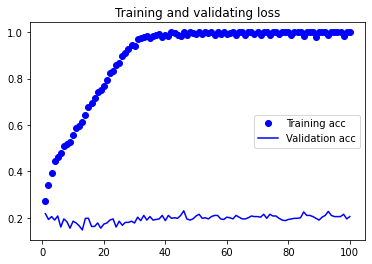

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()

plt.show()